In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

In [27]:
data = pd.read_csv('datasets\Tweets.csv')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\User\AppData\Local\Temp\ipykernel_8264\3943829675.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv('datasets\Tweets.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'datasets\\Tweets.csv'

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [41]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [42]:
print("Dataset shape:", data.shape)
print("Columns:\n", data.columns)
print("\nSample rows:\n", data[['airline_sentiment', 'text']].head())

Dataset shape: (14640, 15)
Columns:
 Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Sample rows:
   airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


In [43]:
columns_to_keep = ['airline_sentiment', 'text']
df = data[columns_to_keep]

In [44]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [45]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


C:\Users\User\AppData\Local\Temp\ipykernel_18668\781694835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


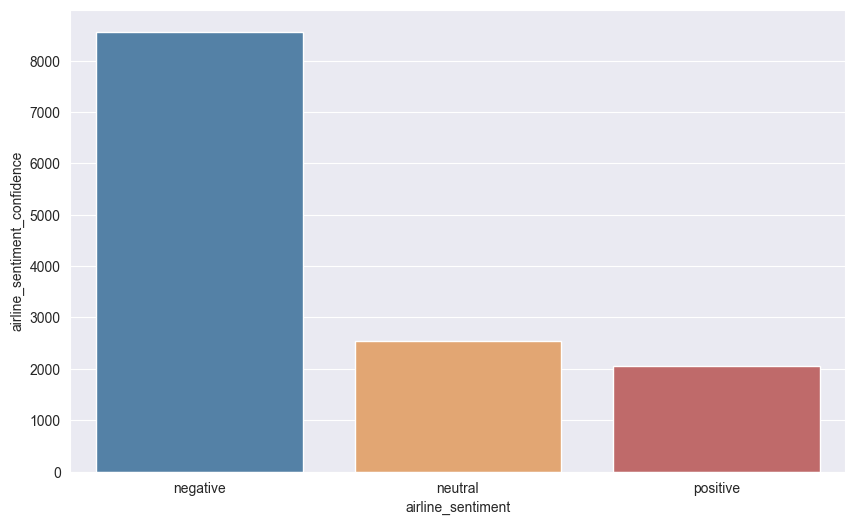

In [46]:
sentiment_summary = data.groupby('airline_sentiment')['airline_sentiment_confidence'].sum().reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='airline_sentiment',
    y='airline_sentiment_confidence',
    data=sentiment_summary,
    palette={'negative': '#4682B4', 'neutral': '#F4A460', 'positive': '#CD5C5C'} 
)

In [47]:

#Observam ca avem mai multe negative

In [48]:

negative_df = data[data['airline_sentiment'] == 'negative']
negativereason_summary = negative_df['negativereason'].value_counts().reset_index()
negativereason_summary.columns = ['negativereason', 'count']

C:\Users\User\AppData\Local\Temp\ipykernel_18668\1062263837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


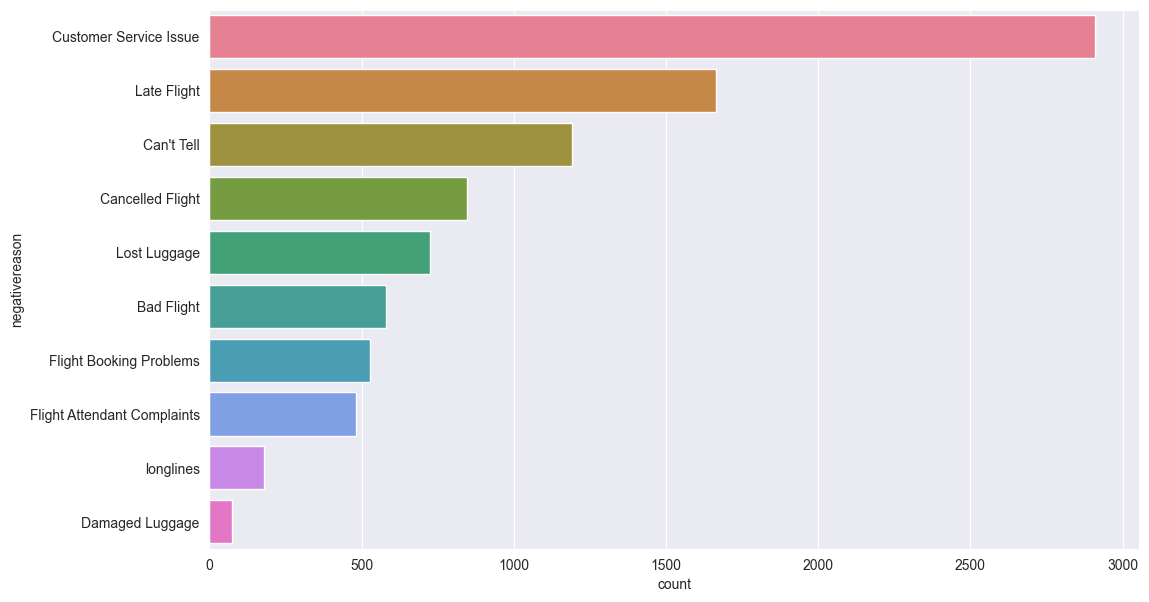

In [49]:
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    y='negativereason',
    x='count',
    data=negativereason_summary,
    palette='husl'  # Schimbă paleta dacă dorești alte culori
)

In [50]:
sentiment_airline = data.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')
print(sentiment_airline)


           airline airline_sentiment  count
0         American          negative   1960
1         American           neutral    463
2         American          positive    336
3            Delta          negative    955
4            Delta           neutral    723
5            Delta          positive    544
6        Southwest          negative   1186
7        Southwest           neutral    664
8        Southwest          positive    570
9       US Airways          negative   2263
10      US Airways           neutral    381
11      US Airways          positive    269
12          United          negative   2633
13          United           neutral    697
14          United          positive    492
15  Virgin America          negative    181
16  Virgin America           neutral    171
17  Virgin America          positive    152


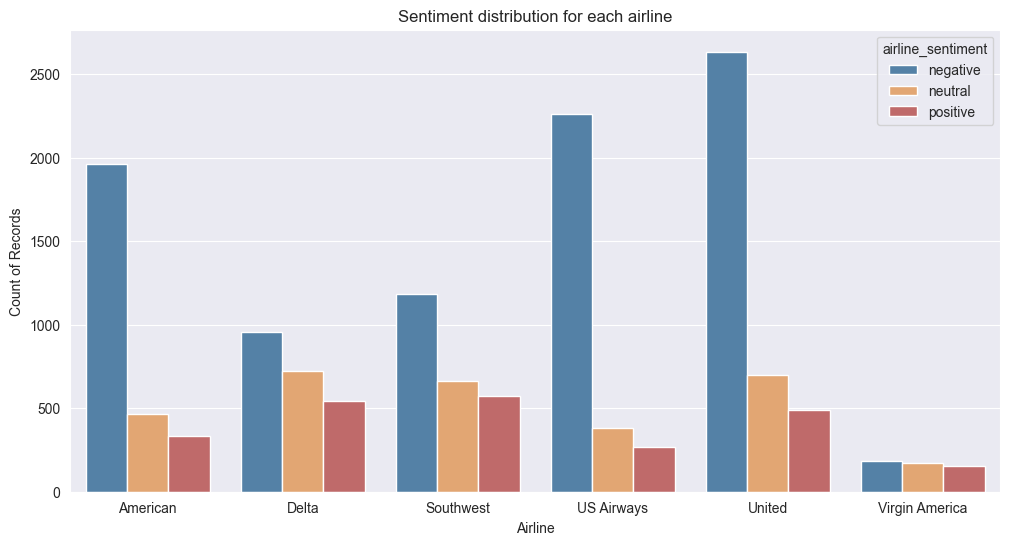

In [51]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Creează graficul bară
sns.barplot(
    data=sentiment_airline,
    x='airline', 
    y='count', 
    hue='airline_sentiment', 
    palette={'negative': '#4682B4', 'neutral': '#F4A460', 'positive': '#CD5C5C'}

)

# Adaugă titlu și etichete
plt.title('Sentiment distribution for each airline')
plt.xlabel('Airline')
plt.ylabel('Count of Records')

# Afișează graficul
plt.show()

In [96]:
X = data.drop(['airline_sentiment'], axis=1)
y = data['airline_sentiment']

<Axes: ylabel='count'>

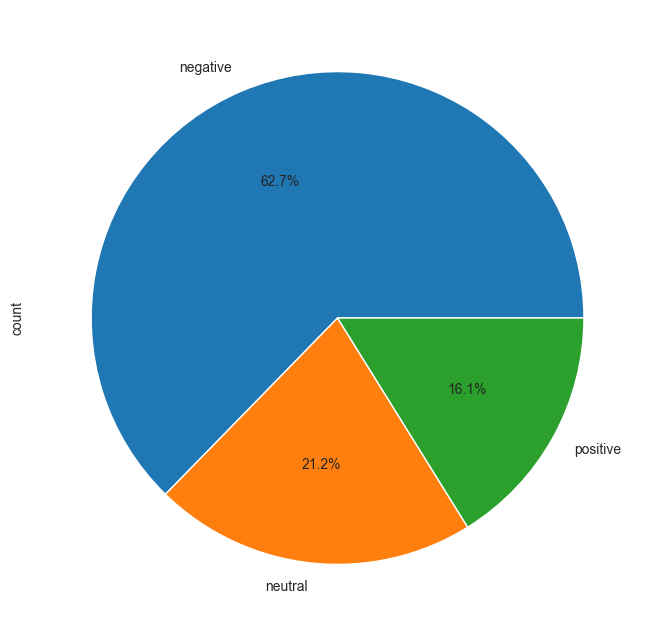

In [97]:
y.value_counts().plot.pie(autopct='%1.1f%%',figsize=(8, 8))

In [55]:
#reducem imbalansarea datelor
#In cazul nostru alegem random under-sampling

In [56]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [57]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


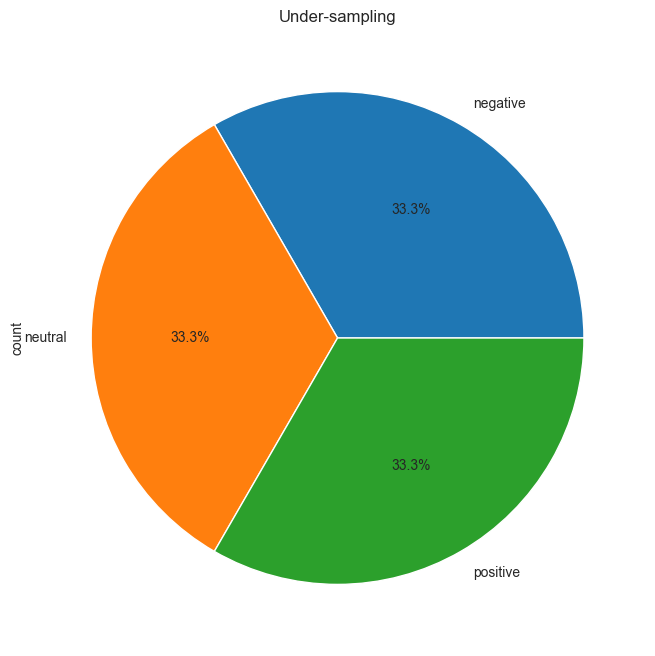

In [99]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%1.1f%%',figsize=(8, 8))
_ = ax.set_title("Under-sampling")

In [100]:
y_res.value_counts()

airline_sentiment
negative    2363
neutral     2363
positive    2363
Name: count, dtype: int64

In [101]:
y.value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [81]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7089 entries, 7537 to 14635
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      7089 non-null   int64  
 1   airline_sentiment_confidence  7089 non-null   float64
 2   negativereason                2363 non-null   object 
 3   negativereason_confidence     3468 non-null   float64
 4   airline                       7089 non-null   object 
 5   airline_sentiment_gold        13 non-null     object 
 6   name                          7089 non-null   object 
 7   negativereason_gold           6 non-null      object 
 8   retweet_count                 7089 non-null   int64  
 9   text                          7089 non-null   object 
 10  tweet_coord                   488 non-null    object 
 11  tweet_created                 7089 non-null   object 
 12  tweet_location                4917 non-null   object 
 13  user

In [105]:
def map_sentiment_and_reason(row):
    if row == 'positive':
        return 12
    elif row == 'neutral':
        return 11
    elif row == 'negative':
        return 10 
    return None  # Handle missing cases
test = y_res.apply(map_sentiment_and_reason)

In [106]:
test.value_counts()

airline_sentiment
10    2363
11    2363
12    2363
Name: count, dtype: int64

In [92]:
y_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   negativereason     2363 non-null   object
 2   mapped_sentiment   14640 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 343.3+ KB


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


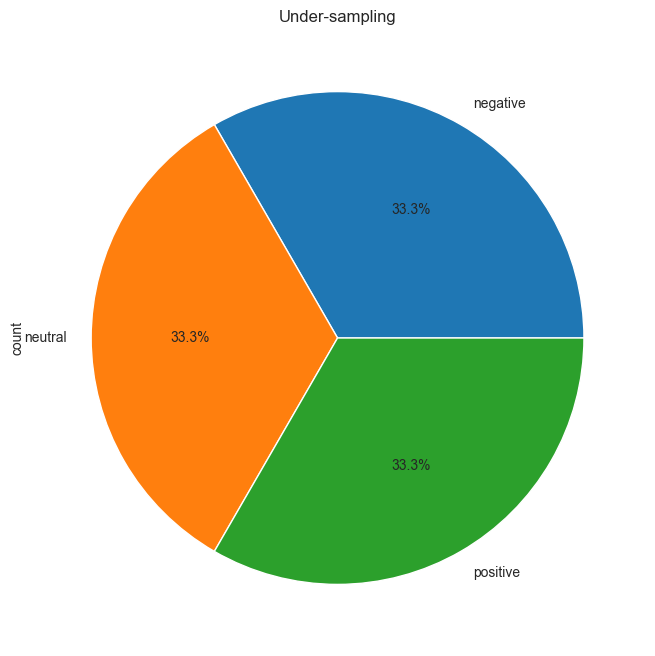

In [77]:
from imblearn.under_sampling import RandomUnderSampler

# Features și etichete
X = data['text'].to_frame()  # Convertim Series într-un DataFrame
y = data['airline_sentiment']

# Aplicăm RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy="not minority", random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Verificăm distribuția claselor
ax = y_res.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
_ = ax.set_title("Under-sampling")


NameError: name 'sdgs' is not defined